In [1]:
from models import Field, Config, Environment, Animal

In [2]:
config = Config(food_per_year=2, eaten_food=1, size=50, init_animals=20, reproduction_rate=.9)

In [3]:
env = Environment(config=config)
env.set_food(food=90, from_x=0, to_x=3, from_y=0, to_y=2)
env.set_danger(danger=80, from_x=config.size - 20, to_x=config.size, from_y=config.size - 20, to_y=config.size)

In [4]:
env.run(number_of_iterations=100, max_population=20_000)

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
print(env.animals_to_numpy)
print(len(env.animals))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
22283


In [6]:
import json 

In [7]:
with open('./data/stats.json', 'w') as outfile:
    json.dump(env.stats, outfile)

In [8]:
with open('./data/stats.json', 'r') as infile:
    d = json.load(infile)

In [9]:
import pandas as pd 

In [10]:
df = pd.DataFrame(env.stats) 

In [11]:
df.to_csv('./data/stats.tsv', sep='\t')

In [12]:
df = pd.read_csv('./data/stats.tsv', sep='\t', index_col=0)

In [13]:
df.tail(20)

iteration   x   y  energy  age  death  children
112669         55  41  15    49.0    2    NaN         2
112670         55  41  15    49.0    2    NaN         0
112671         55  41  15    49.0    1    1.0         1
112672         55  41  15    49.0    2    NaN         2
112673         55  41  15    49.0    2    NaN         2
112674         55  41  15    49.0    2    NaN         1
112675         55  41  15    49.0    1    1.0         1
112676         55  41  15    49.0    2    NaN         1
112677         55  41  15    49.0    2    NaN         0
112678         55  41  15    49.0    2    NaN         2
112679         55  41  15    49.0    2    NaN         0
112680         55  41  15    47.0    4    2.0         4
112681         55  41  15    49.0    2    NaN         0
112682         55  41  15    49.0    2    NaN         0
112683         55  41  15    48.0    3    1.0         2
112684         55  41  15    49.0    2    NaN         1
112685         55  41  15    49.0    2    NaN         2
112686         55  41  15    49.0    2    NaN         2
112687         55  41  15    49.0    1    1.0         2
112688         55  41  15    49.0    2    NaN         1

In [14]:
s = df.groupby('iteration').mean()['energy']

In [15]:
import matplotlib.pyplot as plt

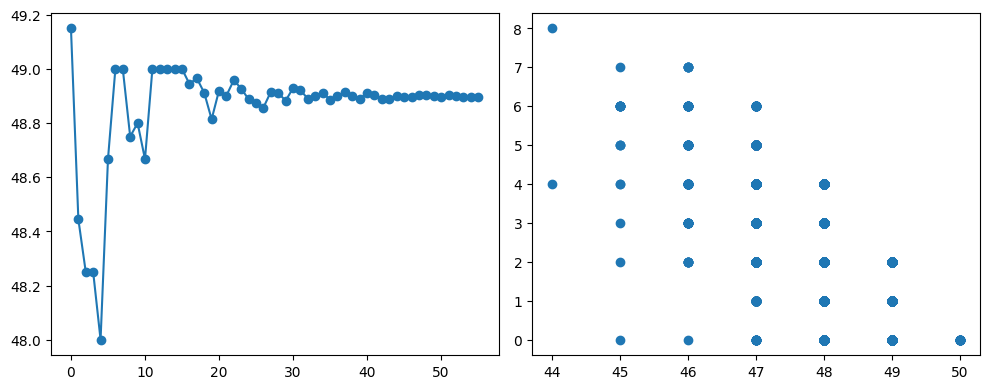

In [16]:
fig, ax = plt.subplots(figsize=(10, 4), ncols=2)
ax[0].plot(s, marker='o')
ax[1].scatter(df['energy'], df['children'])
plt.tight_layout()
plt.show()

## SQL

In [17]:
from sqlalchemy import create_engine, text

In [18]:
engine = create_engine("sqlite:///data/stats.db")
conn = engine.connect()
df.to_sql('stats', conn, if_exists='replace')
conn.close()

In [19]:
sql = "SELECT * FROM stats"
conn = engine.connect()
st = pd.read_sql(text(sql), conn)
conn.close()

In [20]:
st 

index  iteration   x   y  energy  age  death  children
0            0          0   8  38    49.0    2    NaN         0
1            1          0  22  35    49.0    1    1.0         0
2            2          0   4  36    50.0    2    NaN         0
3            3          0  13  26    49.0    1    1.0         0
4            4          0  40  14    49.0    2    NaN         0
...        ...        ...  ..  ..     ...  ...    ...       ...
112684  112684         55  41  15    49.0    2    NaN         1
112685  112685         55  41  15    49.0    2    NaN         2
112686  112686         55  41  15    49.0    2    NaN         2
112687  112687         55  41  15    49.0    1    1.0         2
112688  112688         55  41  15    49.0    2    NaN         1

[112689 rows x 8 columns]

In [21]:
st.groupby('iteration').std()

index          x          y    energy       age     death  \
iteration                                                                    
0             5.916080  16.359128  13.199980  0.366348  0.444262  0.000000   
1             2.738613  14.525839  13.986104  0.527046  0.707107  0.408248   
2             1.290994  16.540355  13.856406  0.957427  0.577350  1.414214   
3             1.290994  15.066519  16.492423  1.500000  1.000000       NaN   
4             1.290994  14.696938  16.492423  2.000000  2.217356  2.121320   
5             1.000000   0.000000   0.000000  0.577350  0.577350       NaN   
6                  NaN        NaN        NaN       NaN       NaN       NaN   
7             0.707107   0.000000   0.000000  0.000000  0.707107       NaN   
8             1.290994   0.000000   0.000000  0.500000  0.816497  0.000000   
9             1.581139   0.000000   0.000000  0.447214  0.000000       NaN   
10            1.870829   0.000000   0.000000  0.816497  0.816497       NaN   
11            2.738613   0.000000   0.000000  0.000000  0.000000       NaN   
12            3.316625   0.000000   0.000000  0.000000  0.000000       NaN   
13            3.316625   0.000000   0.000000  0.000000  0.000000       NaN   
14            3.316625   0.000000   0.000000  0.000000  0.000000       NaN   
15            3.605551   0.000000   0.000000  0.000000  0.288675       NaN   
16            5.338539   0.000000   0.000000  0.235702  0.342997  0.000000   
17            8.514693   0.000000   0.000000  0.185695  0.371391  0.000000   
18            9.958246   0.000000   0.000000  0.287902  0.378806  0.487950   
19           12.556539   0.000000   0.000000  0.500277  0.543766  0.517549   
20           14.577380   0.000000   0.000000  0.340468  0.493219  0.333333   
21           17.752934   0.000000   0.000000  0.300273  0.384111  0.000000   
22           20.928450   0.000000   0.000000  0.201229  0.289352  0.377964   
23           23.815261   0.000000   0.000000  0.305525  0.441726  0.363137   
24           28.434134   0.000000   0.000000  0.348270  0.406138  0.469668   
25           34.496377   0.000000   0.000000  0.422956  0.552087  0.429669   
26           38.537860   0.000000   0.000000  0.392020  0.497201  0.314970   
27           44.600075   0.000000   0.000000  0.301441  0.434926  0.266880   
28           55.281100   0.000000   0.000000  0.303375  0.428909  0.287902   
29           54.126395   0.000000   0.000000  0.354781  0.456365  0.287902   
30           65.384759   0.000000   0.000000  0.273798  0.415742  0.166667   
31           77.509139   0.000000   0.000000  0.269237  0.394849  0.311661   
32           93.963645   0.000000   0.000000  0.360094  0.487488  0.331082   
33          115.325626   0.000000   0.000000  0.324811  0.416184  0.370192   
34          133.800847   0.000000   0.000000  0.333450  0.470736  0.398029   
35          159.781622   0.000000   0.000000  0.355655  0.490855  0.324413   
36          193.267949   0.000000   0.000000  0.321598  0.430680  0.279691   
37          220.403418   0.000000   0.000000  0.308010  0.431174  0.330610   
38          263.704696   0.000000   0.000000  0.334313  0.466656  0.340754   
39          313.934176   0.000000   0.000000  0.348016  0.458868  0.314891   
40          363.874979   0.000000   0.000000  0.307726  0.445134  0.261675   
41          423.630735   0.000000   0.000000  0.318871  0.453414  0.278976   
42          505.037127   0.000000   0.000000  0.342393  0.472235  0.328371   
43          610.114880   0.000000   0.000000  0.351220  0.465669  0.360862   
44          720.388784   0.000000   0.000000  0.341319  0.470237  0.357756   
45          876.562034   0.000000   0.000000  0.342441  0.470058  0.353760   
46         1057.561346   0.000000   0.000000  0.339999  0.459145  0.333386   
47         1253.860439   0.000000   0.000000  0.331869  0.448867  0.347364   
48         1510.203960   0.000000   0.000000  0.325413  0.448982  0.323283   
49         1797.724395   0.000000   0.0

In [22]:
st[st.energy > 45]

index  iteration   x   y  energy  age  death  children
0            0          0   8  38    49.0    2    NaN         0
1            1          0  22  35    49.0    1    1.0         0
2            2          0   4  36    50.0    2    NaN         0
3            3          0  13  26    49.0    1    1.0         0
4            4          0  40  14    49.0    2    NaN         0
...        ...        ...  ..  ..     ...  ...    ...       ...
112684  112684         55  41  15    49.0    2    NaN         1
112685  112685         55  41  15    49.0    2    NaN         2
112686  112686         55  41  15    49.0    2    NaN         2
112687  112687         55  41  15    49.0    1    1.0         2
112688  112688         55  41  15    49.0    2    NaN         1

[112670 rows x 8 columns]

In [23]:
env.stats

[{'iteration': 0,
  'x': 8,
  'y': 38,
  'energy': 49.0,
  'age': 2,
  'death': None,
  'children': 0},
 {'iteration': 0,
  'x': 22,
  'y': 35,
  'energy': 49.0,
  'age': 1,
  'death': 1,
  'children': 0},
 {'iteration': 0,
  'x': 4,
  'y': 36,
  'energy': 50.0,
  'age': 2,
  'death': None,
  'children': 0},
 {'iteration': 0,
  'x': 13,
  'y': 26,
  'energy': 49.0,
  'age': 1,
  'death': 1,
  'children': 0},
 {'iteration': 0,
  'x': 40,
  'y': 14,
  'energy': 49.0,
  'age': 2,
  'death': None,
  'children': 0},
 {'iteration': 0,
  'x': 3,
  'y': 27,
  'energy': 50.0,
  'age': 2,
  'death': None,
  'children': 0},
 {'iteration': 0,
  'x': 12,
  'y': 32,
  'energy': 50.0,
  'age': 2,
  'death': None,
  'children': 0},
 {'iteration': 0,
  'x': 48,
  'y': 29,
  'energy': 49.0,
  'age': 2,
  'death': None,
  'children': 0},
 {'iteration': 0,
  'x': 3,
  'y': 15,
  'energy': 49.0,
  'age': 2,
  'death': None,
  'children': 0},
 {'iteration': 0,
  'x': 41,
  'y': 15,
  'energy': 49.0,
  'age'

## MongoDb

In [24]:
import pymongo

In [25]:
db = pymongo.MongoClient()

In [26]:
db['animals']['astats'].insert_many(env.stats)

InsertManyResult([ObjectId('663e27306b03b7ef3825a56c'), ObjectId('663e27306b03b7ef3825a56d'), ObjectId('663e27306b03b7ef3825a56e'), ObjectId('663e27306b03b7ef3825a56f'), ObjectId('663e27306b03b7ef3825a570'), ObjectId('663e27306b03b7ef3825a571'), ObjectId('663e27306b03b7ef3825a572'), ObjectId('663e27306b03b7ef3825a573'), ObjectId('663e27306b03b7ef3825a574'), ObjectId('663e27306b03b7ef3825a575'), ObjectId('663e27306b03b7ef3825a576'), ObjectId('663e27306b03b7ef3825a577'), ObjectId('663e27306b03b7ef3825a578'), ObjectId('663e27306b03b7ef3825a579'), ObjectId('663e27306b03b7ef3825a57a'), ObjectId('663e27306b03b7ef3825a57b'), ObjectId('663e27306b03b7ef3825a57c'), ObjectId('663e27306b03b7ef3825a57d'), ObjectId('663e27306b03b7ef3825a57e'), ObjectId('663e27306b03b7ef3825a57f'), ObjectId('663e27306b03b7ef3825a580'), ObjectId('663e27306b03b7ef3825a581'), ObjectId('663e27306b03b7ef3825a582'), ObjectId('663e27306b03b7ef3825a583'), ObjectId('663e27306b03b7ef3825a584'), ObjectId('663e27306b03b7ef3825a5

In [27]:
collection = db['animals']['astats']

In [28]:
for record in collection.find({'energy': {'$gt': 45}}):
    print(record)
    break


{'_id': ObjectId('663e24af8c058b85300a726b'), 'iteration': 0, 'x': 19, 'y': 31, 'energy': 50.0, 'age': 2, 'death': None, 'children': 0}


In [32]:
pipeline = [
    {'$match': {'energy': {'$gt': 45}}},
    {'$group': {'_id': "$age", 'count': {'$sum': 1}}},
]
for record in collection.aggregate(pipeline):
    print(record)

{'_id': 4, 'count': 2161}
{'_id': 5, 'count': 265}
{'_id': 2, 'count': 99800}
{'_id': 3, 'count': 11633}
{'_id': 1, 'count': 22395}
